### modelling
1. find the relevant variabies
2. convert catgorical variables to numeric
3. train test split
4. build model:<br/>
  multiple linear regression <br/>
  lasso <br/>
  random forest <br/>
5. tue hyperparameters using randomGridsearch/RandomizedSearchCV


In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
import operator as op

from sklearn.impute import SimpleImputer

import seaborn as sns

In [32]:
#laod data
df_model = pd.read_csv('/Users/liminzhenscc/Documents/study/python_data_analyze/project/2data_sc_salary/glassdoor_jobs_eda.csv')
df_model.head()


,Unnamed: 0,Job Title,Salary Estimate,Average Salary,Job Description,Rating,Company Name,Location,Size,Founded,...,r_yn,ML_yn,excel_yn,spark_yn,aws_yn,graduate_yn,ave_salary,job_simp,job_level,desc_len
0,0,Data Science Graduate/Undergraduate - Immed St...,$97K - $141K (Glassdoor Est.),"$116,841 /yr (est.)",Be part of the Award Winning CIMIC Graduate Pr...,3.8,UGL Limited\n3.8,North Shore,5001 to 10000 Employees,1984,...,1,0,1,0,0,1,116841.0,na,na,2319
1,1,Graduate Data Science - Brisbane (Corporate),$97K - $141K (Glassdoor Est.),"$128,589 /yr (est.)",Job Number:\n82295\nWork type:\nPermanent - Fu...,3.7,Aurizon\n3.7,Brisbane,1001 to 5000 Employees,2009,...,1,1,0,0,0,1,128589.0,na,na,4012
2,2,Consulting - Data & AI - 2022/23 Summer Vacati...,$97K - $141K (Glassdoor Est.),"$78,167 /yr (est.)","Date: 18-Jul-2022\n\nLocation:\nCanberra, ACT,...",4.0,Deloitte\n4.0,Canberra,10000+ Employees,1850,...,1,1,1,0,0,0,78167.0,consulting,na,3348
3,3,Data Scientist,$97K - $141K (Glassdoor Est.),"$125,000 /yr (est.)",Job description\nData Scientist Skills\nProgra...,-1.0,GoTech Solutions Pty Ltd,Sydney,-1,-1,...,1,1,1,0,0,0,125000.0,data scientist,na,1828
4,4,Research Associate - Data Science,$97K - $141K (Glassdoor Est.),"$102,500 /yr (est.)",Job no: 510607\nWork type: Full time\nLocation...,4.2,University of New South Wales\n4.2,Sydney,1001 to 5000 Employees,1949,...,1,1,0,0,0,0,102500.0,research,na,6499


In [33]:
df_model.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Average Salary',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'min_salary', 'max_salary', 'company_name', 'age', 'python_yn', 'r_yn',
       'ML_yn', 'excel_yn', 'spark_yn', 'aws_yn', 'graduate_yn', 'ave_salary',
       'job_simp', 'job_level', 'desc_len'],
      dtype='object')

In [34]:
model_col = ['Rating','Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_name', 'age', 
             'python_yn', 'r_yn', 'ML_yn', 'excel_yn', 'spark_yn', 'aws_yn', 'graduate_yn', 'ave_salary','job_simp', 
             'job_level', 'desc_len']
data = df_model[model_col]

In [35]:
x_data = data.drop('ave_salary', axis=1)
y_data = data['ave_salary']

In [36]:
x_data

,Rating,Location,Size,Type of ownership,Industry,Sector,Revenue,company_name,age,python_yn,r_yn,ML_yn,excel_yn,spark_yn,aws_yn,graduate_yn,job_simp,job_level,desc_len
0,3.8,North Shore,5001 to 10000 Employees,Subsidiary or Business Segment,Construction,"Construction, Repair & Maintenance Services",-1,UGL Limited,38,0,1,0,1,0,0,1,na,na,2319
1,3.7,Brisbane,1001 to 5000 Employees,Company - Public,Taxi & Car Services,Transportation & Logistics,$2 to $5 billion (USD),Aurizon,13,0,1,1,0,0,0,1,na,na,4012
2,4.0,Canberra,10000+ Employees,Company - Private,Accounting & Tax,Finance,$10+ billion (USD),Deloitte,172,0,1,1,1,0,0,0,consulting,na,3348
3,-1.0,Sydney,-1,Company - Public,-1,-1,-1,GoTech Solutions Pty Ltd,-1,1,1,1,1,0,0,0,data scientist,na,1828
4,4.2,Sydney,1001 to 5000 Employees,College / University,Colleges & Universities,Education,-1,University of New South Wales,73,1,1,1,0,0,0,0,research,na,6499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.0,Canberra,10000+ Employees,Company - Private,Accounting & Tax,Finance,$10+ billion (USD),Deloitte,172,0,1,0,0,0,0,0,analyst,na,5276
1257,3.8,Perth,10000+ Employees,Company - Public,Mining & Metals,"Energy, Mining, Utilities",$10+ billion (USD),Rio Tinto,149,0,1,0,0,0,0,0,na,na,6599
1258,5.0,Sydney,1 to 50 Employees,Unknown,-1,-1,-1,Autumn Compass,-1,1,1,0,0,0,0,0,software developer,na,2334
1259,3.9,Sydney,-1,Unknown,-1,-1,-1,EY,-1,0,1,0,0,0,0,0,business information,senior,5266


In [37]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             1261 non-null   float64
 1   Location           1261 non-null   object 
 2   Size               1261 non-null   object 
 3   Type of ownership  1261 non-null   object 
 4   Industry           1261 non-null   object 
 5   Sector             1261 non-null   object 
 6   Revenue            1261 non-null   object 
 7   company_name       1261 non-null   object 
 8   age                1261 non-null   int64  
 9   python_yn          1261 non-null   int64  
 10  r_yn               1261 non-null   int64  
 11  ML_yn              1261 non-null   int64  
 12  excel_yn           1261 non-null   int64  
 13  spark_yn           1261 non-null   int64  
 14  aws_yn             1261 non-null   int64  
 15  graduate_yn        1261 non-null   int64  
 16  job_simp           1261 

In [38]:
# This will turn all of the string values into category values
for label, content in x_data.items():
    if pd.api.types.is_string_dtype(content):
        x_data[label] = content.astype("category").cat.as_ordered()

In [39]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rating             1261 non-null   float64 
 1   Location           1261 non-null   category
 2   Size               1261 non-null   category
 3   Type of ownership  1261 non-null   category
 4   Industry           1261 non-null   category
 5   Sector             1261 non-null   category
 6   Revenue            1261 non-null   category
 7   company_name       1261 non-null   category
 8   age                1261 non-null   int64   
 9   python_yn          1261 non-null   int64   
 10  r_yn               1261 non-null   int64   
 11  ML_yn              1261 non-null   int64   
 12  excel_yn           1261 non-null   int64   
 13  spark_yn           1261 non-null   int64   
 14  aws_yn             1261 non-null   int64   
 15  graduate_yn        1261 non-null   int64   
 16  job_si

In [40]:
x_data.isna().sum()

Rating               0
Location             0
Size                 0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
company_name         0
age                  0
python_yn            0
r_yn                 0
ML_yn                0
excel_yn             0
spark_yn             0
aws_yn               0
graduate_yn          0
job_simp             0
job_level            0
desc_len             0
dtype: int64

In [43]:
x_data.replace(-1, np.NaN, inplace=True)
x_data.replace('-1', np.NaN, inplace=True)
x_data.isna().sum()

Rating               127
Location               0
Size                 152
Type of ownership     44
Industry             417
Sector               415
Revenue              568
company_name           0
age                  504
python_yn              0
r_yn                   0
ML_yn                  0
excel_yn               0
spark_yn               0
aws_yn                 0
graduate_yn            0
job_simp               0
job_level              0
desc_len               0
dtype: int64

In [44]:
# Fill numeric rows with the median
for label, content in x_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            x_data[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            x_data[label] = content.fillna(content.median())

In [45]:
#turning categorical value to numbers
# Check columns which *aren't* numeric
for label, content in x_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Location
Size
Type of ownership
Industry
Sector
Revenue
company_name
job_simp
job_level


In [25]:
# Add binary column to inidicate whether sample had missing value


na        1006
senior     130
junior     125
Name: job_level, dtype: int64

In [46]:
# Turn categorical variables into numbers
for label, content in x_data.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        x_data[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        x_data[label] = pd.Categorical(content).codes+1  

In [49]:
x_data.describe()

,Rating,Location,Size,Type of ownership,Industry,Sector,Revenue,company_name,age,python_yn,r_yn,ML_yn,excel_yn,spark_yn,aws_yn,graduate_yn,job_simp,job_level,desc_len
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.0,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000
mean,4.037193,10.444092,2.912768,3.011895,9.428232,6.344171,2.319588,38.957970,68.822363,0.343378,1.0,0.279144,0.348136,0.020619,0.051546,0.295797,6.022205,2.003965,3522.008723
std,0.427122,7.789457,2.036649,1.835458,11.927784,5.535071,2.454702,26.035823,58.290884,0.475025,0.0,0.448756,0.476569,0.142160,0.221197,0.456581,3.075941,0.449850,1527.683315
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,114.000000
25%,3.800000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,23.000000,38.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,2836.000000
50%,4.000000,8.000000,2.000000,2.000000,1.000000,6.000000,3.000000,28.000000,41.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,3426.000000
75%,4.000000,21.000000,5.000000,3.000000,22.000000,11.000000,3.000000,64.000000,117.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,8.000000,2.000000,4497.000000
max,5.000000,21.000000,7.000000,8.000000,36.000000,18.000000,10.000000,90.000000,173.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000,12946.000000


In [50]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rating                        1261 non-null   float64
 1   Location                      1261 non-null   int8   
 2   Size                          1261 non-null   int8   
 3   Type of ownership             1261 non-null   int8   
 4   Industry                      1261 non-null   int8   
 5   Sector                        1261 non-null   int8   
 6   Revenue                       1261 non-null   int8   
 7   company_name                  1261 non-null   int8   
 8   age                           1261 non-null   float64
 9   python_yn                     1261 non-null   int64  
 10  r_yn                          1261 non-null   int64  
 11  ML_yn                         1261 non-null   int64  
 12  excel_yn                      1261 non-null   int64  
 13  spa

In [51]:
x_data.head()

,Rating,Location,Size,Type of ownership,Industry,Sector,Revenue,company_name,age,python_yn,...,age_is_missing,Location_is_missing,Size_is_missing,Type of ownership_is_missing,Industry_is_missing,Sector_is_missing,Revenue_is_missing,company_name_is_missing,job_simp_is_missing,job_level_is_missing
0,3.8,11,5,7,11,3,0,80,38.0,0,...,False,False,False,False,False,False,True,False,False,False
1,3.7,3,3,3,35,18,5,8,13.0,0,...,False,False,False,False,False,False,False,False,False,False
2,4.0,4,2,2,1,6,3,23,172.0,0,...,False,False,False,False,False,False,False,False,False,False
3,4.0,21,0,3,0,0,0,35,41.0,1,...,True,False,True,False,True,True,True,False,False,False
4,4.2,21,3,1,9,4,0,81,73.0,1,...,False,False,False,False,False,False,True,False,False,False


In [53]:
y_data

0       116841.0
1       128589.0
2        78167.0
3       125000.0
4       102500.0
          ...   
1256     72849.0
1257     72849.0
1258    120000.0
1259     67572.0
1260     81505.0
Name: ave_salary, Length: 1261, dtype: float64

#### train test split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1008, 30) (1008,)
(253, 30) (253,)


#### start modelling

linear model

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [68]:
np.mean(cross_val_score(lm, x_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-24582.030389913907

In [114]:
show_scores(lm, x_train, y_train, x_test, y_test)

{'Training MAE': 23747.297724215463,
 'Test MAE': 24706.934709794274,
 'Training RMSE': 32921.30474433851,
 'Test RMSE': 35769.135676385384,
 'Training R^2': 0.44819060907220387,
 'Test R^2': 0.3332879884430968}

lasso model

In [116]:
from sklearn.linear_model import Lasso
lml = Lasso(max_iter=10000)
lml.fit(x_train,y_train)

Lasso(max_iter=10000)

In [117]:
np.mean(cross_val_score(lml, x_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-24587.547854303568

In [80]:
alpha=[]
error=[]
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=i/100, max_iter=10000)
    error.append(np.mean(cross_val_score(lml, x_train, y_train, scoring='neg_mean_absolute_error', cv=3)))

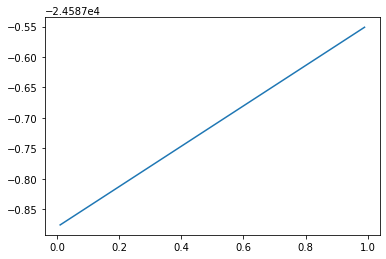

In [81]:
plt.plot(alpha,error)

In [86]:
l=Lasso(alpha=0.5, max_iter=10000)
l.fit(x_train,y_train)
np.mean(cross_val_score(l, x_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-24587.71331441075

In [118]:
show_scores(lml, x_train, y_train, x_test, y_test)

{'Training MAE': 23749.834866876205,
 'Test MAE': 24700.329393200765,
 'Training RMSE': 32921.392451851,
 'Test RMSE': 35729.49274460972,
 'Training R^2': 0.4481876688549862,
 'Test R^2': 0.3347650032980859}

Lasso did not help in this case

randomforest model

In [89]:
rs=RandomForestRegressor()
rs.fit(x_train,y_train)
np.mean(cross_val_score(rs, x_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-12049.395730367301

it seems the randomForest model is the best model so far<br/>
let's start to tuning the model's hyperparameters

In [111]:
# Create evaluation function (the competition uses Root Mean Square Error)
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmse(y_test, y_preds):
    return np.sqrt(mean_squared_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, val_preds),
              "Training RMSE": rmse(y_train, train_preds),
              "Test RMSE": rmse(y_test, val_preds),
              "Training R^2": model.score(x_train, y_train),
              "Test R^2": model.score(x_test, y_test)}
    return scores

randomForestmodel

In [92]:
#using randomize search to find the best hyperparameters for randomForest model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 5),
           'criterion':['mse','mae'],
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           }

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              scoring='neg_mean_absolute_error',
                              cv=3,
                              verbose=True)

rs_model.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])},
                   scoring='neg_mean_absolute_error', verbose=True)

In [93]:
#show the best parameters of random forest model
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 18,
 'min_samples_leaf': 15,
 'max_features': 0.5,
 'max_depth': None,
 'criterion': 'mae'}

In [97]:
#using the best model to fit the train data
rs_best = RandomForestRegressor(n_estimators=30,
                                min_samples_split=18,
                                min_samples_leaf=15,
                                max_features=0.5,
                                max_depth=None, 
                                criterion='mae')
rs_best.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', max_features=0.5, min_samples_leaf=15,
                      min_samples_split=18, n_estimators=30)

In [98]:
np.mean(cross_val_score(rs_best, x_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-15169.596792328042

In [102]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,100,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(RandomForestRegressor(),parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 100, 10)},
             scoring='neg_mean_absolute_error')

In [103]:
gs.best_params_

{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 90}

In [104]:

gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=90)

In [105]:
gs.best_score_

-10909.617476851852

In [112]:
show_scores(gs.best_estimator_, x_train, y_train, x_test, y_test)

{'Training MAE': 8849.281944444443,
 'Test MAE': 12700.804281949935,
 'Training RMSE': 23949.754084166514,
 'Test RMSE': 29925.177594907407,
 'Training R^2': 0.7079635058078138,
 'Test R^2': 0.5333461422604059}